<a href="https://colab.research.google.com/github/NervOUs11/Cat_or_Dog/blob/main/CatVSDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [ ]:
#install kaggle library
!pip install kaggle

In [3]:
#Configuring the path of kaggle.json file
#  !!!!! Upload kaggle.json first !!!!!

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Download dataset from kaggle
!kaggle datasets download -d tongpython/cat-and-dog

 99% 216M/218M [00:06<00:00, 38.6MB/s]
100% 218M/218M [00:06<00:00, 33.2MB/s]


In [5]:
#Extract the zip file
from zipfile import ZipFile
dataset = '/content/cat-and-dog.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall() 

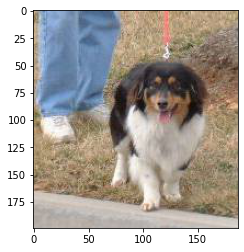

In [6]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg

# Show dog image
img = mpimg.imread('/content/training_set/training_set/dogs/dog.2.jpg')
imgplt = plt.imshow(img)
plt.show()

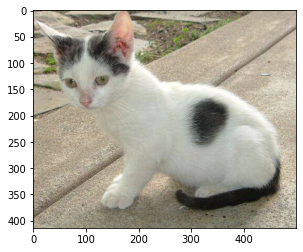

In [7]:
# Show cat image
img = mpimg.imread('/content/training_set/training_set/cats/cat.3.jpg')
imgplt = plt.imshow(img)
plt.show()

In [25]:
# Resize the image
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'

train_data = ImageDataGenerator(
              rescale=1/255,
              rotation_range=50,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True,
              fill_mode='nearest')
test_data = ImageDataGenerator(rescale=1/255)

train_data = train_data.flow_from_directory(
    train_dir,
    target_size=(512,512),
    batch_size=25,
    class_mode='binary'
)

test_data = test_data.flow_from_directory(
    test_dir,
    target_size=(512,512),
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D 

# Build model
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape = (512,512,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 510, 510, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 255, 255, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 253, 253, 32)      18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 32)      

In [21]:
# Compile model
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train model
history = model.fit(train_data,epochs=30,validation_data=test_data)

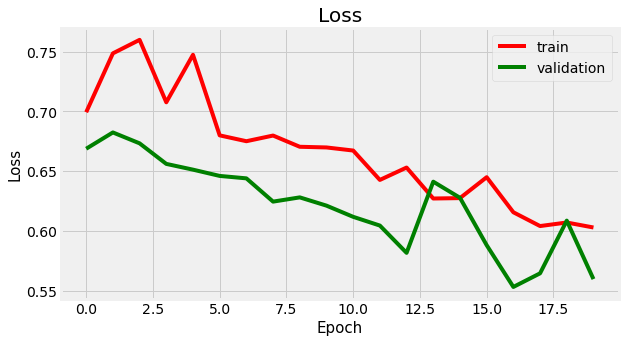

In [ ]:
# Show loss
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='green',label='validation')
plt.title('Loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
plt.show()

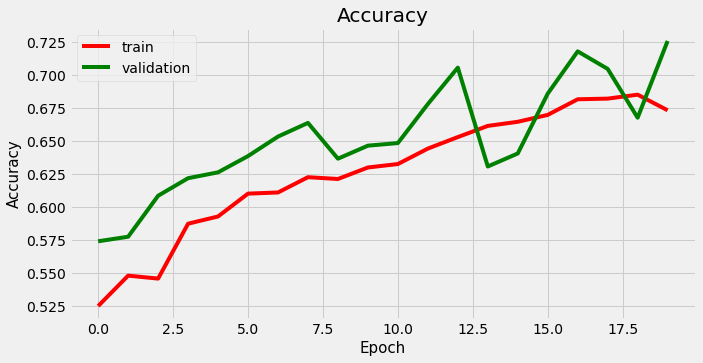

In [ ]:
# Show accuracy
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='green',label='validation')
plt.title('Accuracy')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend()
plt.show()

Saving dog.4031.jpg to dog.4031.jpg
Saving dog.4032.jpg to dog.4032.jpg
Saving dog.4033.jpg to dog.4033.jpg
Saving dog.4034.jpg to dog.4034.jpg


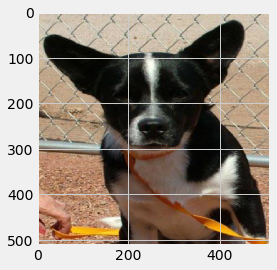

1/1 [==============================] - 0s 288ms/step
A dog
-----------------------------------



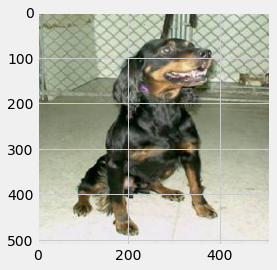

1/1 [==============================] - 0s 20ms/step
A dog
-----------------------------------



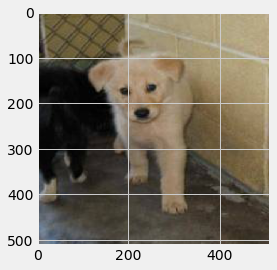

1/1 [==============================] - 0s 19ms/step
A dog
-----------------------------------



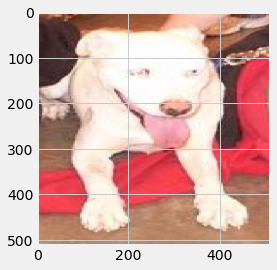

1/1 [==============================] - 0s 21ms/step
A cat
-----------------------------------



In [ ]:
#Test model (Upload new image)
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = '/content/' + fn
  img = load_img(path, target_size=(512, 512))

  imgplt = plt.imshow(img)
  plt.show()

  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)

  if classes > 0.5:
    print("A dog")
    print("-----------------------------------")
    print()
  else:
    print("A cat")
    print("-----------------------------------")
    print()